In [48]:
import numpy as np
import pickle
import os


import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})
USE_TEX = False
if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [49]:
DATA_PATH = "data/output_directory/"
files = os.listdir(DATA_PATH)

### Plot each parameter vs. mean wealth at end of simulation

In [96]:
PC = []
A  = []
RL = []
RR = []
W  = []

for file in files:
    with open(os.path.join(DATA_PATH, file), "rb") as f:
        data = pickle.load(f)
    
    params = file.split("_")
    params[-1] = params[-1][:-7]
    # "project_cost", "default_a", "risky_return_left", "risky_return_right"
    pc, a, rl, rr = list(map(float, params))
    
    PC.append(pc)
    A.append(a)
    RL.append(rl)
    RR.append(rr)
    W.append(np.mean(data['W'][-1]))

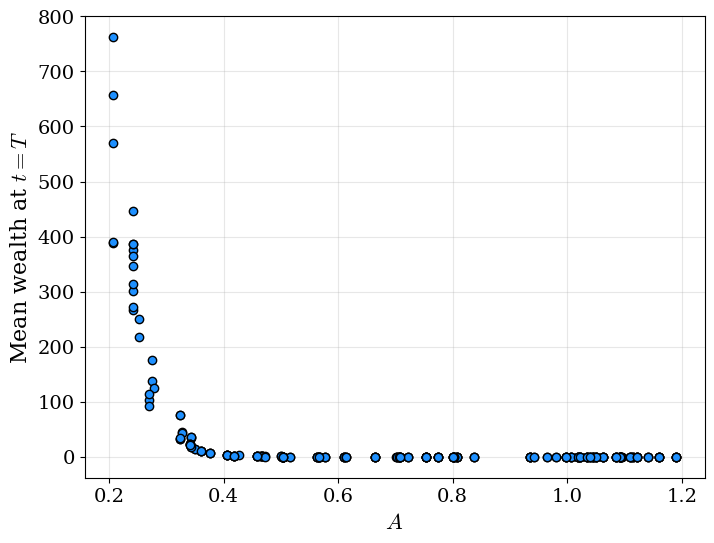

In [62]:
plt.scatter(A, W, color="dodgerblue", edgecolor='k')
plt.xlabel(r"$A$")
plt.ylabel(r"Mean wealth at $t=T$")
plt.show()

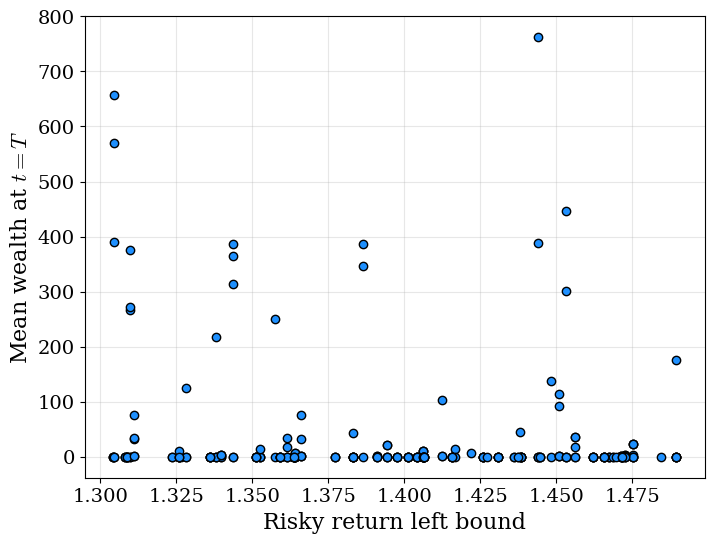

In [71]:
plt.scatter(RL, W, color="dodgerblue", edgecolor='k')
plt.xlabel("Risky return left bound")
plt.ylabel(r"Mean wealth at $t=T$")
plt.show()

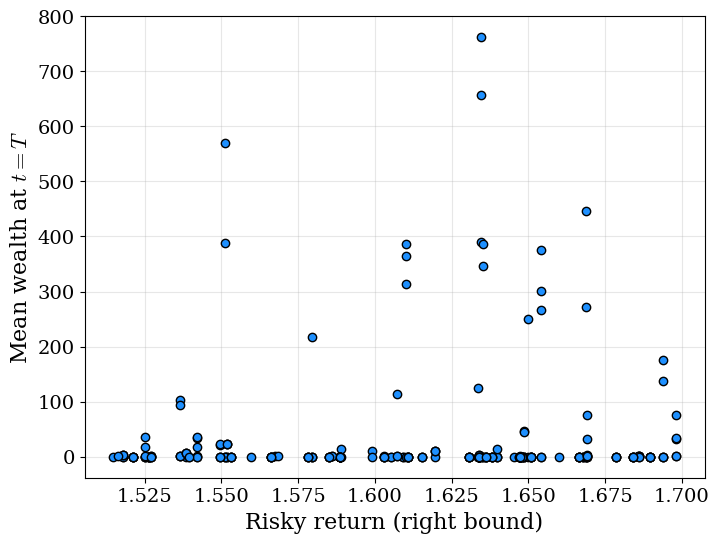

In [70]:
plt.scatter(RR, W, color="dodgerblue", edgecolor='k')
plt.xlabel("Risky return (right bound)")
plt.ylabel(r"Mean wealth at $t=T$")
plt.show()

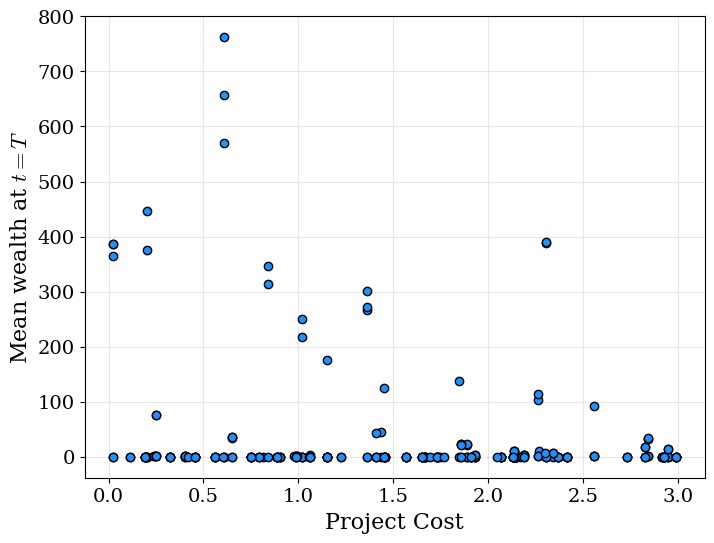

In [69]:
plt.scatter(PC, W, color="dodgerblue", edgecolor='k')
plt.xlabel(r"Project Cost")
plt.ylabel(r"Mean wealth at $t=T$")
plt.show()

In [72]:
from collections import Counter

In [73]:
dict(Counter(A))

{1.111829168908298: 2,
 0.773845874518156: 5,
 0.20629094522446395: 5,
 0.7001894095912575: 1,
 1.0193822503089904: 5,
 0.3432365020737052: 5,
 0.5632073728367686: 4,
 0.27457381673157216: 2,
 0.2694175893440843: 3,
 0.8004248689860105: 5,
 0.50221813544631: 3,
 0.3231823991984129: 5,
 0.7070299440994858: 3,
 1.109815652295947: 3,
 0.6095017500221729: 4,
 0.5671461818739771: 5,
 0.4584148282185197: 5,
 0.7033057807013392: 3,
 1.190451568737626: 5,
 0.24209498036652805: 5,
 0.4635900368914008: 2,
 0.466452681273222: 5,
 0.5037676271051168: 5,
 0.36101189702749253: 4,
 1.09164481125772: 5,
 1.0510185535997152: 5,
 1.0952200962230563: 1,
 1.0344974983483552: 5,
 0.40578495878726245: 5,
 0.8016105469316244: 4,
 1.0844839921221137: 5,
 0.998327337950468: 5,
 1.0936280803754925: 4,
 1.0229722697287797: 5,
 0.41780605241656305: 5,
 1.0626612881198525: 5,
 0.2519070401787758: 2,
 1.160888939909637: 5,
 0.7086783627048134: 5,
 0.9808041209354996: 2,
 1.0447403470054268: 5,
 0.8073218658566474: 

In [158]:
w  = []
pc = []
rl = []
rr = []

for i in range(len(A)):
    if A[i] == 1.1221104830503463:
        w.append(W[i])
        pc.append(PC[i])
        rl.append(RL[i])
        rr.append(RR[i])

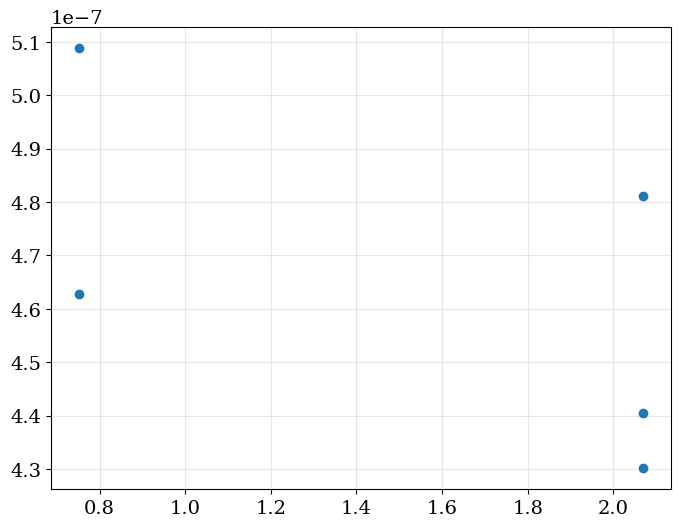

In [159]:
plt.scatter(pc, w)
plt.show()

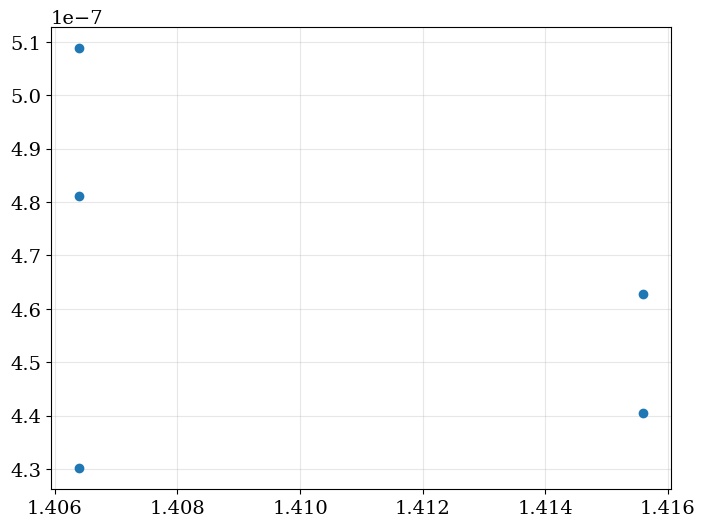

In [160]:
plt.scatter(rl, w)
plt.show()

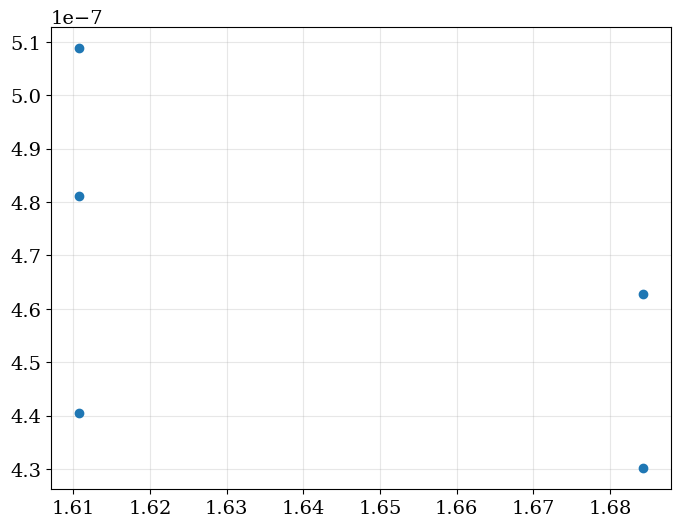

In [161]:
plt.scatter(rr, w)
plt.show()

In [253]:
ww = []
allocs = []
communities = []
pcost = []
cons = []

for file in files:
    
    params = file.split("_")
    params[-1] = params[-1][:-7]
    pc, a, rl, rr = list(map(float, params))
    
    if a == 0.5632073728367686:
        with open(os.path.join(DATA_PATH, file), "rb") as f:
            data = pickle.load(f)
            
            ww.append(data["W"])
            allocs.append(data["alloc"])
            communities.append(data["communities"])
            pcost.append(pc)
            cons.append(data["C"])

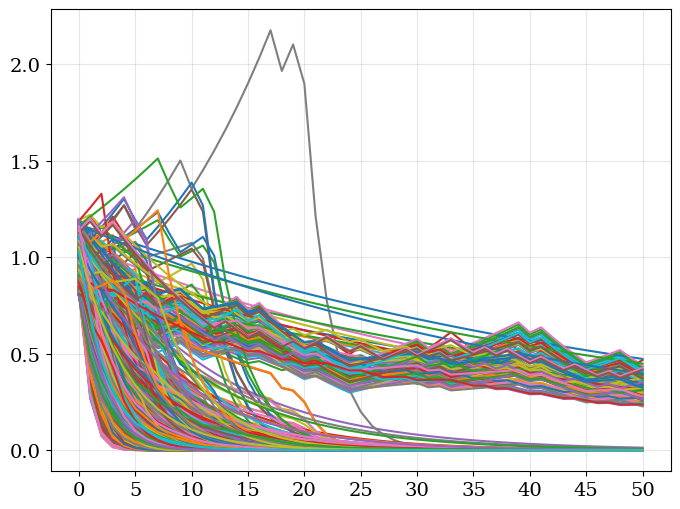

In [201]:
w = ww[2]

for i in range(w.shape[1]):
    plt.plot(w[:,i])
plt.xticks(np.arange(0, len(w), 5))
plt.show()

In [196]:
for col in range(w.shape[1]):
    if max(w[:,col]) > 2:
        print(col)

597


In [223]:
print(allocs[2][597])
print(pcost[2])

[0.62556338 0.37443662]
1.0174958000145853


In [224]:
for c in communities[2]:
    if 597 in communities[2][c]:
        print(c)

2


In [232]:
members = communities[2][2]
members

[2,
 8,
 16,
 207,
 278,
 4,
 526,
 65,
 9,
 597,
 21,
 127,
 26,
 997,
 34,
 63,
 66,
 151,
 716,
 73,
 81,
 838,
 800,
 102,
 944,
 124,
 138,
 142,
 156,
 163,
 183,
 217,
 877,
 694,
 475,
 260,
 901,
 401,
 268,
 375,
 269,
 382,
 270,
 273,
 282,
 368,
 417,
 422,
 928,
 831,
 766,
 591,
 720]

In [243]:
membership = {}
for m in members:
    comms = []
    for c in communities[2]:
        if m in communities[2][c]:
            comms.append(c)
    membership[m] = comms

In [259]:
investment_into_project_2 = []

for t in range(w.shape[0]-1):
    amnt = 0
    for m in members:
        
        idx = membership[m].index(2)
        
        i = w[t,m] * (1-cons[2][t,m]) * w[t,m] * allocs[2][m][idx]
        amnt += i
    investment_into_project_2.append(amnt)

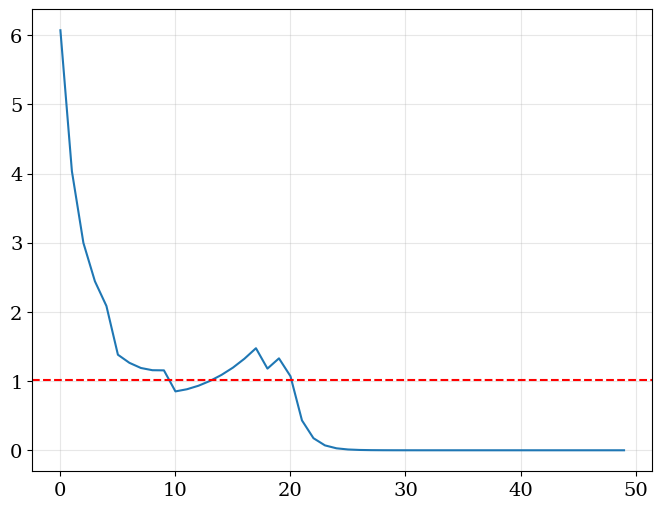

In [264]:
plt.plot(investment_into_project_2)
plt.axhline(pcost[2], color="red", linestyle="dashed")
plt.show()

In [188]:
mean_initial_consumption = []
A = []

for file in files:
    with open(os.path.join(DATA_PATH, file), "rb") as f:
        data = pickle.load(f)
    
    params = file.split("_")
    params[-1] = params[-1][:-7]
    pc, a, rl, rr = list(map(float, params))
    
    A.append(a)
    mean_initial_consumption.append(np.mean(data["C"][0]))

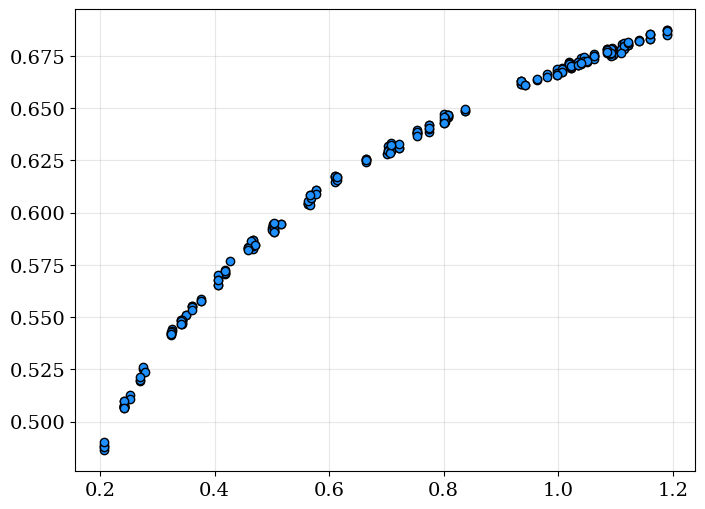

In [191]:
plt.scatter(A, mean_initial_consumption, color="dodgerblue", edgecolor='k')
plt.show()

In [187]:
len(A)

256